In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 데이터 불러오기
df = pd.read_csv('hw.csv')

# 데이터 전처리 - 스케일링
scaler = StandardScaler()
features = df.drop(columns=['target'])
scaled_features = scaler.fit_transform(features)

# LDA - 2차원으로 차원 축소
lda = LDA(n_components=2)
X_lda = lda.fit_transform(scaled_features, df['target'])

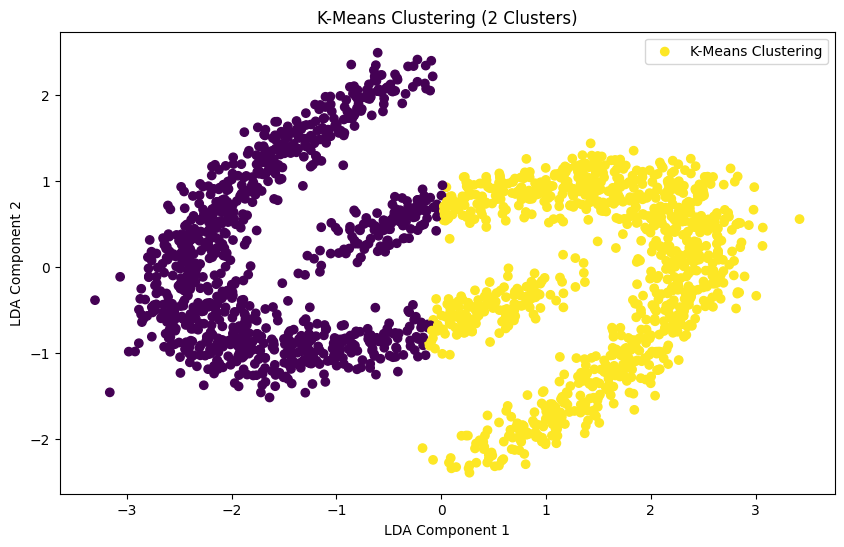

In [4]:
# K-Means 군집화
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_lda)

plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=kmeans_labels, cmap='viridis', label='K-Means Clustering')
plt.title('K-Means Clustering (2 Clusters)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()


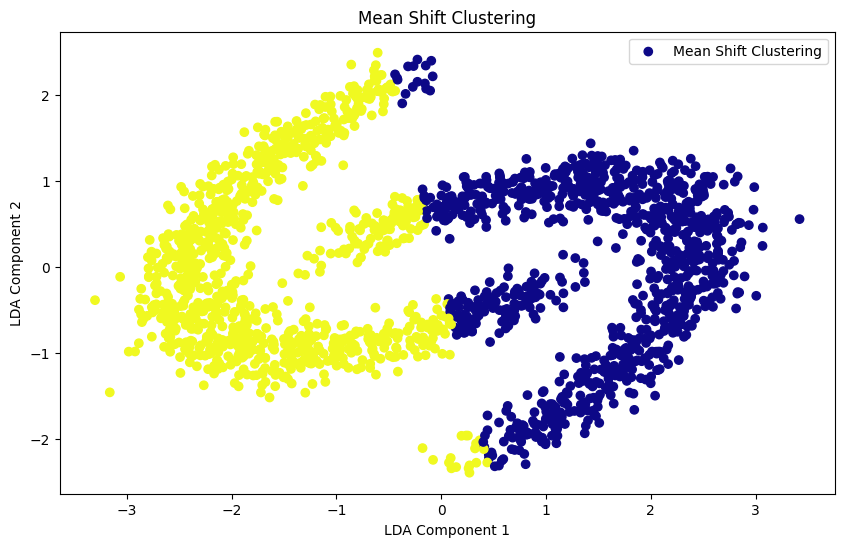

In [5]:
# Mean Shift 군집화
bandwidth = estimate_bandwidth(X_lda, quantile=0.2)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_labels = mean_shift.fit_predict(X_lda)

plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=mean_shift_labels, cmap='plasma', label='Mean Shift Clustering')
plt.title('Mean Shift Clustering')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()


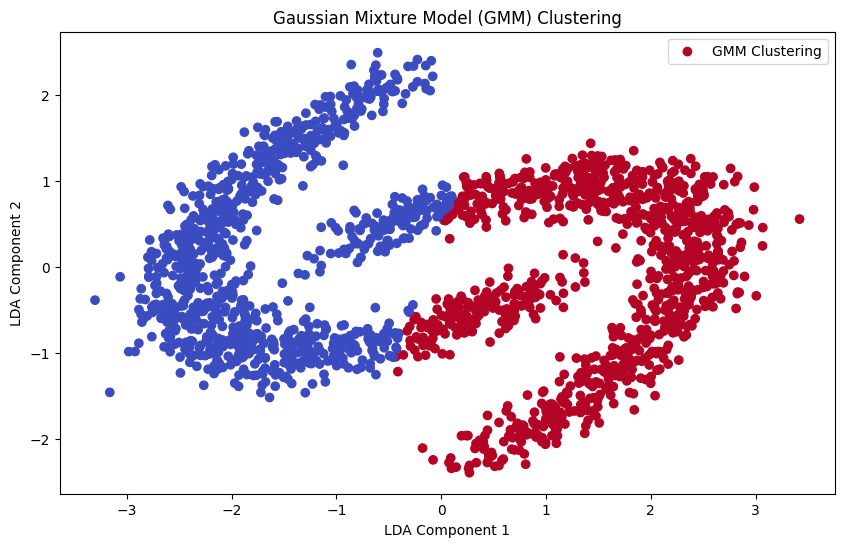

In [6]:
# Gaussian Mixture Model (GMM) 군집화
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_lda)

plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=gmm_labels, cmap='coolwarm', label='GMM Clustering')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()

Best Parameters: eps=0.30000000000000004, min_samples=8


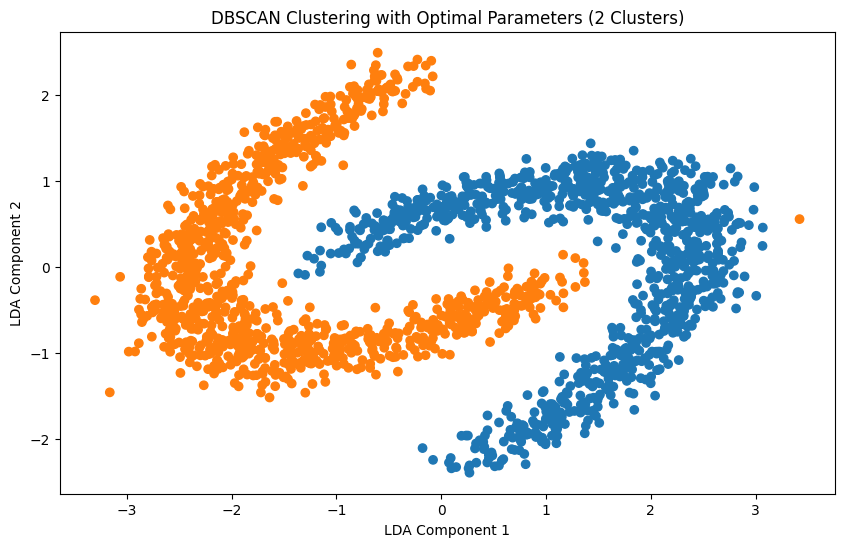

In [21]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 최적의 eps와 min_samples 찾기
def find_best_dbscan_params(data, eps_values, min_samples_values):
    best_score = -1
    best_params = {'eps': None, 'min_samples': None}
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            unique_labels = set(labels)
            unique_labels.discard(-1)  # 노이즈 제거
            if len(unique_labels) == 2:  # 정확히 2개의 군집인 경우
                score = silhouette_score(data, labels)
                if score > best_score:
                    best_score = score
                    best_params['eps'] = eps
                    best_params['min_samples'] = min_samples
    if best_params['eps'] is None or best_params['min_samples'] is None:
        best_params = {'eps': eps_values[0], 'min_samples': min_samples_values[0]}  # 기본값 설정
    return best_params

# eps와 min_samples의 가능한 값들
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(2, 10)

# 최적의 eps와 min_samples 찾기
best_params = find_best_dbscan_params(X_lda, eps_values, min_samples_values)
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")

# 최적의 파라미터로 DBSCAN 군집화 수행
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan.fit_predict(X_lda)

plt.figure(figsize=(10, 6))
# 정확히 두 개의 군집을 위한 색상 설정
colors = ['tab:blue' if label == 0 else 'tab:orange' for label in dbscan_labels]
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=colors)
plt.title('DBSCAN Clustering with Optimal Parameters (2 Clusters)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()
